<a href="https://colab.research.google.com/github/slapazromero/Ejercicio_ANS/blob/main/ANS_Jugadores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importación de librerías necesarias.
Comenzamos importando las librerías necesarias para realizar todos los procesos relacionados con el modelo de predicción.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
import plotly.express as px

# Preprocesamiento y elección de variables relevantes para el estudio.

## Importacion de los datos del dataset.
Descargar el archivo pertinente y lo importamos para comenzar con su análisis y preprocesamiento.


In [2]:
df = pd.read_csv('cod.csv')

## Mostrar las primeras y ultimas filas del dataframe importado.
Analizando las primeras y últimas filas del dataframe, observamos que hay variables numericas excepto la del nombre de los jugadores que se podria considerar como un ID.

In [3]:
df.head()

,name,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
0,RggRt45#4697369,0,0,0.00000,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0
1,JohniceRex#9176033,0,0,0.00000,0,1,0,110,0,7,0,7.0,0,0,0,700,0.0,0,16
2,bootybootykill#1892064,0,66,1.03125,0,9,0,110,0,32,16,32.0,0,1,0,48300,0.0,0,64
3,JNaCo#5244172,3,2,0.40000,0,1,0,0,0,3,0,3.0,0,0,0,1150,0.0,0,5
4,gomezyayo_007#6596687,0,2,0.20000,0,1,0,110,0,5,1,5.0,0,0,0,1000,0.0,0,10


In [4]:
df.tail()

,name,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
1553,ImranePROPG#2085215,0,51,0.432203,0,10,0,110,0,71,11,71.0,0,0,0,49935,0.0,0,118
1554,Miguel_mor#1492856,0,0,0.000000,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0
1555,Trianthor#3462590,0,0,0.000000,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0
1556,tinytrex594#3976133,0,0,0.000000,0,1,0,0,2,1,0,1.0,0,1,7,0,91.2,9,0
1557,TomasFJ_05#2711069,1,35,0.686275,3,5,1,110,17,10,6,10.0,1,11,63,17126,39.0,80,51


## Modificaciones de los datos.
En este caso solo cambiaremos la columna name y la trataremos como id.

In [5]:
df = df.set_index('name')

## Mostrar las primeras y ultimas filas del dataframe modificado.

In [6]:
df.head()

,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
name,,,,,,,,,,,,,,,,,,
RggRt45#4697369,0,0,0.00000,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0
JohniceRex#9176033,0,0,0.00000,0,1,0,110,0,7,0,7.0,0,0,0,700,0.0,0,16
bootybootykill#1892064,0,66,1.03125,0,9,0,110,0,32,16,32.0,0,1,0,48300,0.0,0,64
JNaCo#5244172,3,2,0.40000,0,1,0,0,0,3,0,3.0,0,0,0,1150,0.0,0,5
gomezyayo_007#6596687,0,2,0.20000,0,1,0,110,0,5,1,5.0,0,0,0,1000,0.0,0,10


In [7]:
df.tail()

,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
name,,,,,,,,,,,,,,,,,,
ImranePROPG#2085215,0,51,0.432203,0,10,0,110,0,71,11,71.0,0,0,0,49935,0.0,0,118
Miguel_mor#1492856,0,0,0.000000,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0
Trianthor#3462590,0,0,0.000000,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0
tinytrex594#3976133,0,0,0.000000,0,1,0,0,2,1,0,1.0,0,1,7,0,91.2,9,0
TomasFJ_05#2711069,1,35,0.686275,3,5,1,110,17,10,6,10.0,1,11,63,17126,39.0,80,51


## Mostrar parámetros estadísticos de los datos.
Mostramos los parámetros estadísticos de los datos para analizarlos y comprender mejor estos.

In [8]:
df.describe()

,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
count,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1.558000e+03,1558.000000,1.558000e+03,1558.000000
mean,153.002567,3753.001926,0.637098,6.895379,44.414634,4.998074,47.657253,10330.189987,425.915918,630.672657,21.428416,116.695764,685.797176,45356.671374,8.726335e+05,107.868825,5.568677e+04,3875.397946
std,301.984766,7929.696675,0.430459,10.184677,68.318064,7.005778,51.626213,22954.104384,786.182499,1305.150393,82.640000,256.354836,1518.383825,97919.428339,1.795755e+06,116.526676,1.202811e+05,7992.666443
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,0.000000,4.000000,0.261442,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,0.000000,2.106250e+03,0.000000,0.000000e+00,14.000000
50%,10.000000,191.500000,0.732837,5.000000,11.000000,2.000000,14.000000,214.500000,51.000000,32.000000,3.031116,3.000000,36.500000,1307.500000,6.396800e+04,56.793995,1.565000e+03,269.000000
75%,168.000000,3445.750000,0.955293,12.000000,51.000000,8.000000,110.000000,9015.500000,485.500000,602.750000,9.085714,110.500000,609.750000,40906.750000,8.286690e+05,221.648976,5.078100e+04,3698.750000
max,3519.000000,66935.000000,3.000000,235.000000,435.000000,80.000000,117.000000,209851.000000,7479.000000,11719.000000,1349.000000,3745.000000,14531.000000,965775.000000,1.497054e+07,413.800000,1.166620e+06,67888.000000


## Comprobar la existencia de datos nulos
Comprobamos la existencia de nulos para estudiar si es necesario rellenar esos datos.

In [9]:
df.isnull().sum()

wins              0
kills             0
kdRatio           0
killstreak        0
level             0
losses            0
prestige          0
hits              0
timePlayed        0
headshots         0
averageTime       0
gamesPlayed       0
assists           0
misses            0
xp                0
scorePerMinute    0
shots             0
deaths            0
dtype: int64

## Mostramos un histograma
Hacemos un estudio del histograma de los datos para ver como están repartidos y seleccionar los datos mas interesantes para hacer la división de cluster.

<ipython-input-10-41f6ce8af5f0>:1: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df[df.columns.tolist()].hist(ax = plt.figure(figsize = (15, 15)).gca())


array([[<Axes: title={'center': 'wins'}>,
        <Axes: title={'center': 'kills'}>,
        <Axes: title={'center': 'kdRatio'}>,
        <Axes: title={'center': 'killstreak'}>],
       [<Axes: title={'center': 'level'}>,
        <Axes: title={'center': 'losses'}>,
        <Axes: title={'center': 'prestige'}>,
        <Axes: title={'center': 'hits'}>],
       [<Axes: title={'center': 'timePlayed'}>,
        <Axes: title={'center': 'headshots'}>,
        <Axes: title={'center': 'averageTime'}>,
        <Axes: title={'center': 'gamesPlayed'}>],
       [<Axes: title={'center': 'assists'}>,
        <Axes: title={'center': 'misses'}>,
        <Axes: title={'center': 'xp'}>,
        <Axes: title={'center': 'scorePerMinute'}>],
       [<Axes: title={'center': 'shots'}>,
        <Axes: title={'center': 'deaths'}>, <Axes: >, <Axes: >]],
      dtype=object)

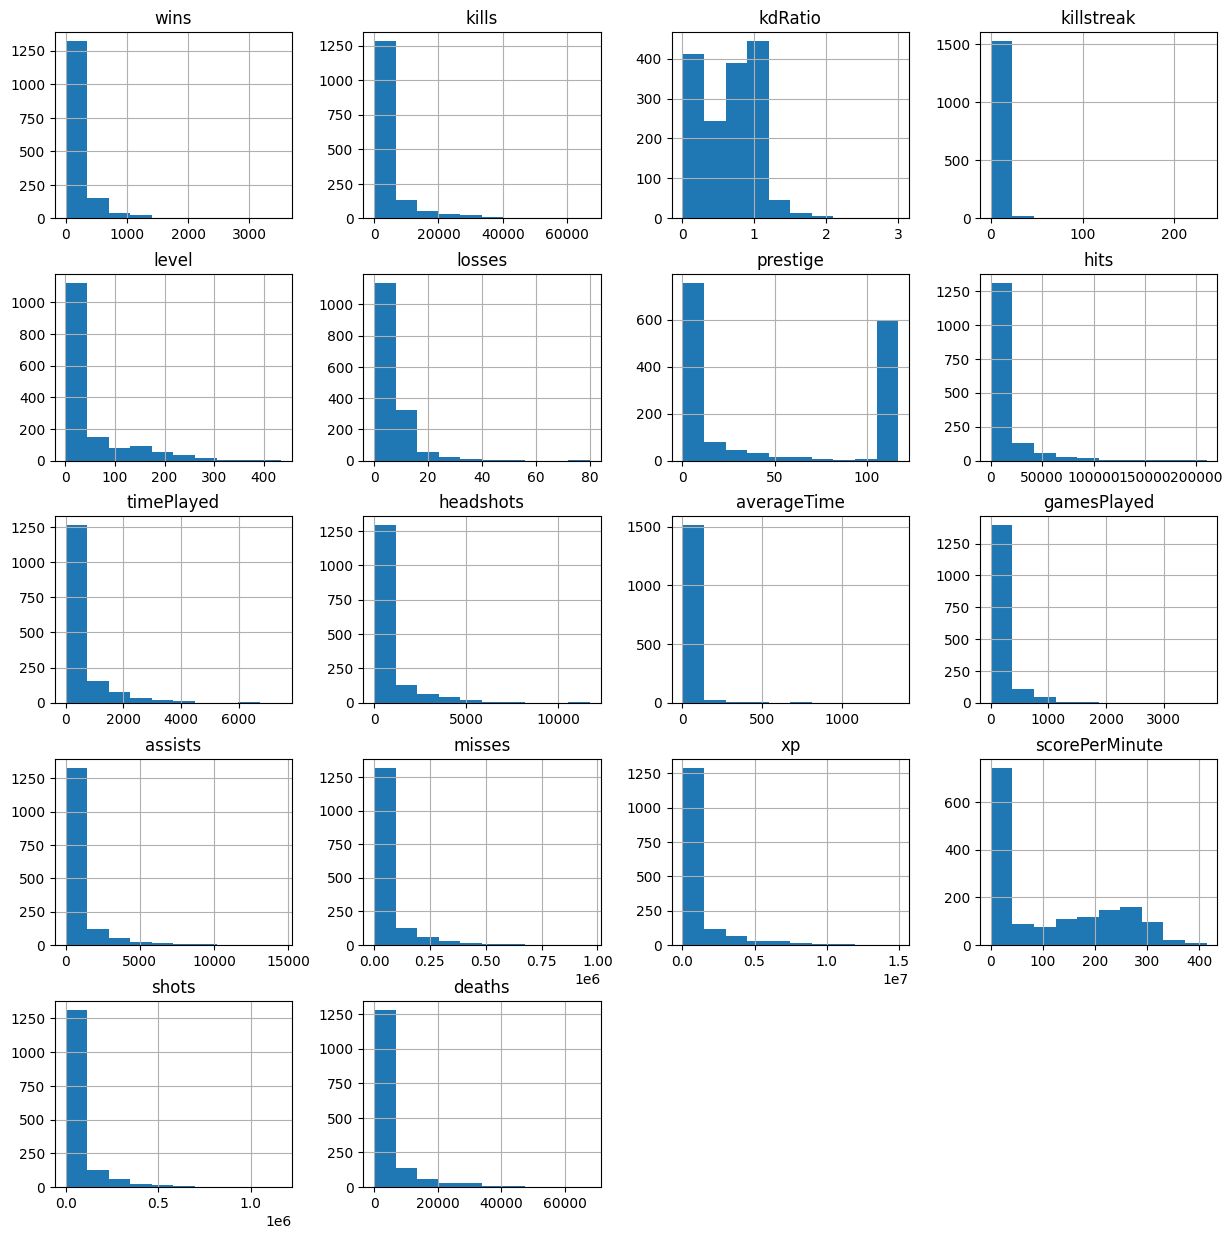

In [10]:
df[df.columns.tolist()].hist(ax = plt.figure(figsize = (15, 15)).gca())

## Estudiamos la relacion cruzada.
En este caso no tiene mucho sentido hacer este estudio.

## Elección de variables relevantes
Habiendo realizado el estudio estadístico anterior, en este caso realizaremos el estudio con con todas las variables ya que no son demasiadas.

# Escalamiento y detección de outliers.

## Escalamiento.


### Estudio de las escalas.
Aqui usamos la funcion boxplot para ver la escala de los datos y visualizar de forma rapida si es necesario escalarlos.

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:#474646'` for same effect.
  warnings.warn(msg, FutureWarning)


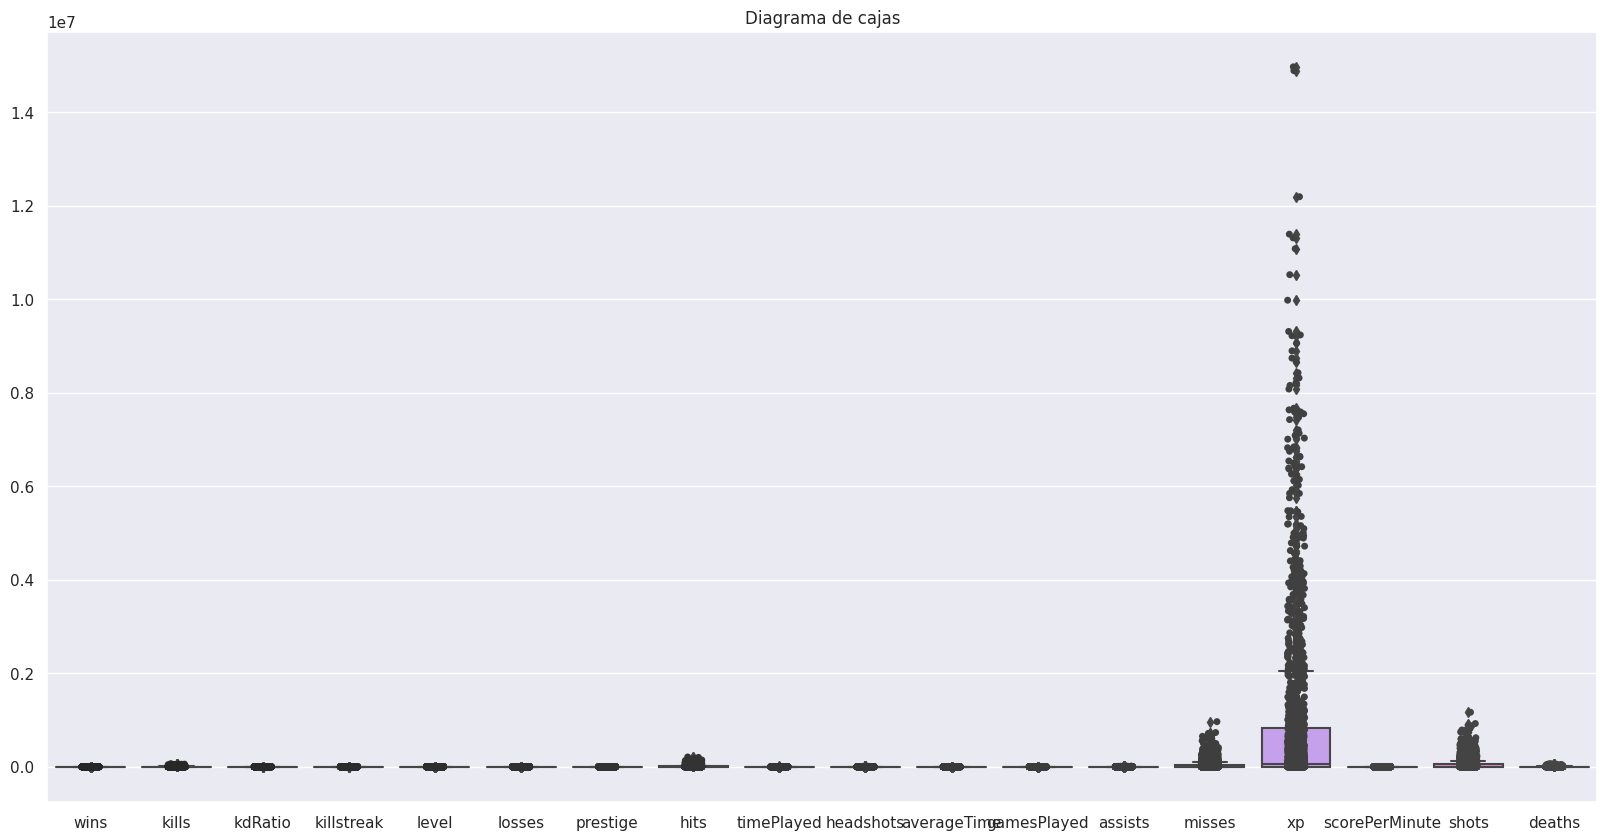

In [13]:
sns.boxplot(df)
sns.stripplot(df, color = '#474646')
plt.title('Diagrama de cajas')
plt.show()

### Estudio de correlación.
En este caso vemos si existe una correlacion excesivamente alta entre alguno de los datos para escalar alguno de ellos para evitar sobre entrenamiento.

<Axes: >

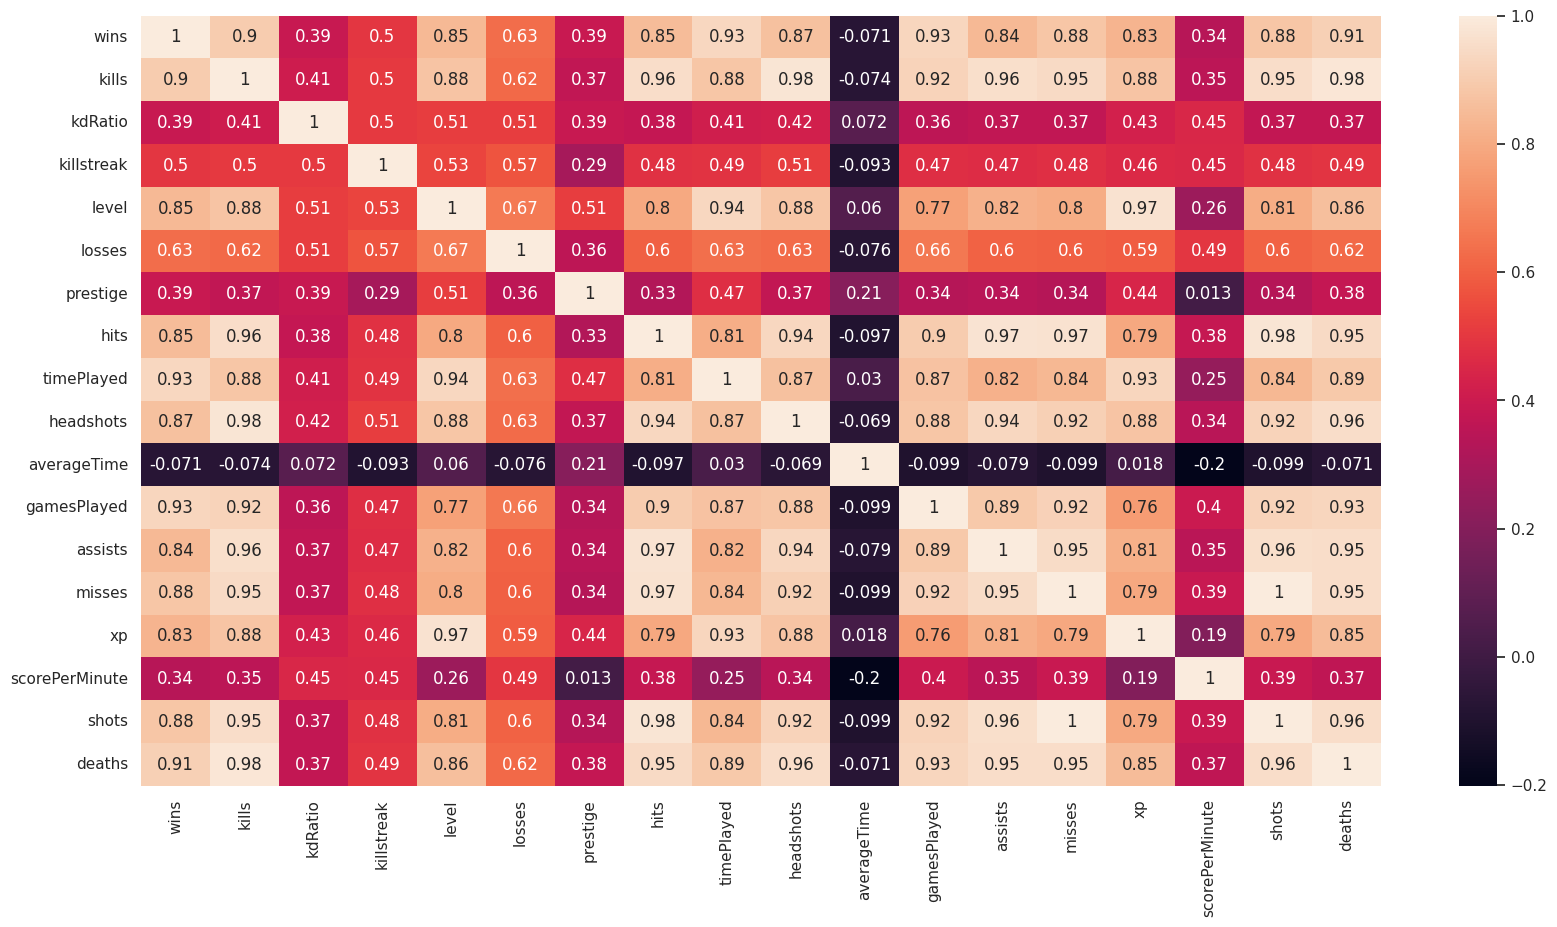

In [12]:
sns.set(rc = {'figure.figsize':(20, 10)})
sns.heatmap(df.corr(), annot=True)

### Escalamiento de datos.
En este caso vemos en el primer estudio que la columna xp tiene una escala muy superior al resto de datos por lo que habria que escalarlos.

In [18]:
scaler = MinMaxScaler()

In [19]:
data_escalada = scaler.fit_transform(df)

In [20]:
df = pd.DataFrame(data_escalada, columns=df.columns, index=df.index)

In [21]:
df.describe()

,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
count,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000
mean,0.043479,0.056069,0.212366,0.029342,0.100034,0.062476,0.407327,0.049226,0.056948,0.053816,0.015885,0.031160,0.047195,0.046964,0.058290,0.260679,0.047733,0.057085
std,0.085816,0.118469,0.143486,0.043339,0.157415,0.087572,0.441250,0.109383,0.105119,0.111370,0.061260,0.068453,0.104493,0.101389,0.119953,0.281601,0.103102,0.117733
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000060,0.087147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000535,0.000085,0.001483,0.000000,0.000000,0.000000,0.000141,0.000000,0.000000,0.000206
50%,0.002842,0.002861,0.244279,0.021277,0.023041,0.025000,0.119658,0.001022,0.006819,0.002731,0.002247,0.000801,0.002512,0.001354,0.004273,0.137250,0.001341,0.003962
75%,0.047741,0.051479,0.318431,0.051064,0.115207,0.100000,0.940171,0.042961,0.064915,0.051434,0.006735,0.029506,0.041962,0.042356,0.055353,0.535643,0.043528,0.054483
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Detectar los outliers y eliminarlos.

### Jacknife

In [23]:
X = df.to_numpy()
SSE = []
K = 4

In [24]:
for i in range(0, X.shape[0]):
  df_np = np.delete(X, i, axis = 0)
  kmeans = KMeans(n_clusters = K, n_init = 10, random_state = 100).fit(df_np)
  SSE.append(kmeans.inertia_)

In [25]:
sigma = np.std(SSE)
mu = np.mean(SSE)

umbral = 2

outliers = []
for i in range(0, X.shape[0]):
  if np.abs(SSE[i] - mu) > umbral * sigma:
    outliers.append(df.index[i])

print(outliers)

['d3rdud32017#5663104', 'CaptnDee#8295627', 'Ties veurop jong#5386670', 'SPoOKY#6529753', 'Crusty Lips#5492303', 'LCD#6383035', 'RicoP33#8756696', 'Sathurakunndy#5935498', 'xXnutmaster69Xx#7768855', 'Jmac442#4874565', 'BURLEYxRAGE#8200010', 'NTMR_fruitpunch#9317993', 'Super-Tosto69#8537760', 'aboelnagakareem_#5123633', 'II Wartaken II#8674285', 'Mr_B4RBAR1AN#3106110', 'BigGunzGaming', 'City_Streets7723#5909611', 'bro#6308926', 'XxCdot214xX#2257860', 'kingslab#9866125', 'Fernoo#6604406', 'COPA#2901463', 'E3elite7130#8915972', 'ComeRuSh#6998295', '最弱#4082677', 'Mista Payne#5135455', 'mike_hawks_long#6691320', 'JOMPLE#3345836', 'Lucky_#3820176', 'Killopen#6131856', 'PS4#4724361', 'ASEREKO#4734593', 'Nyxfrost#9423244', 'josh0590', 'RLifante_BR#3815442', 'culioncisimo74#4272370', 'JermWormy#5125402']


In [26]:
df = df.drop(outliers)

# Determinar el valor de k (número de grupos)

## Optimizando la función BIC

In [27]:
def BIC(k, X):
    gmm = GaussianMixture(n_components=k, init_params='kmeans')
    gmm.fit(X)
    return k, gmm.bic(X)

In [28]:
bic_score = pd.DataFrame([BIC(k, df) for k in range(2, 30)], columns=['k', 'BIC'])

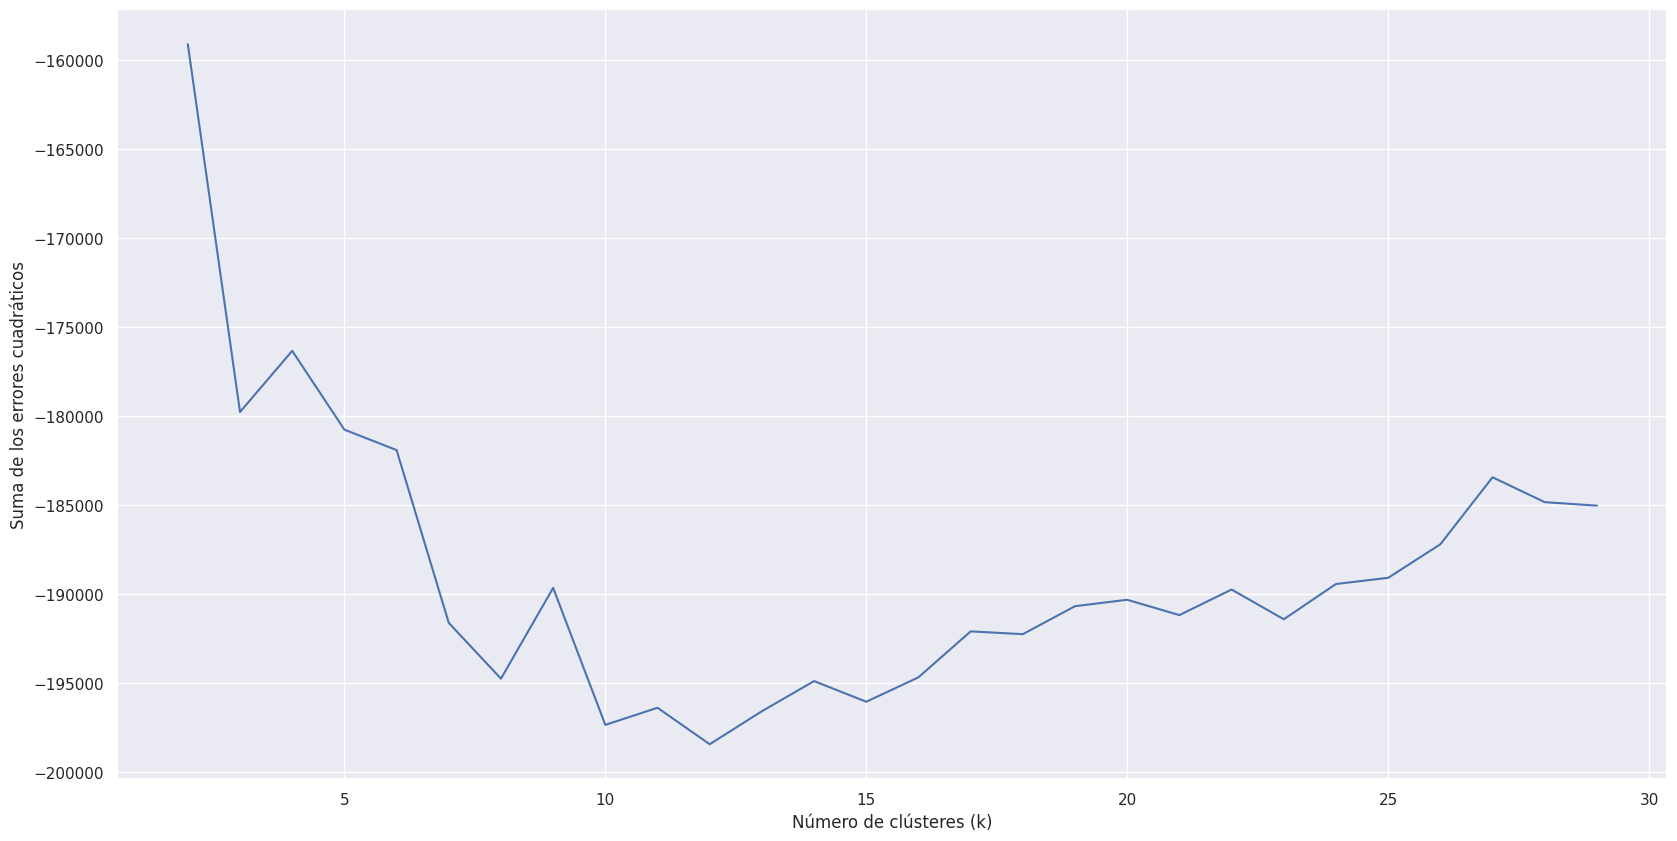

In [29]:
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Suma de los errores cuadráticos')
plt.plot(bic_score['k'],bic_score['BIC'])

In [30]:
k_optimized = bic_score[bic_score.BIC == bic_score.BIC.min()]
k_optimized

,k,BIC
10,12,-198416.896547


In [31]:
k = k_optimized['k'].values[0]

# Ejecución de análisis con los datos calculados (k y n_init)

In [32]:
kmeans = KMeans(n_clusters=k, n_init = 10, random_state=1)
kmeans.fit(df)
labels = kmeans.labels_
pred = kmeans.predict(df)
centroides = kmeans.cluster_centers_

In [33]:
labels

array([ 6, 10,  0, ...,  6,  6, 10], dtype=int32)

In [34]:
centroides

array([[1.61531279e-02, 1.56578344e-02, 3.06696828e-01, 2.45592705e-02,
        9.26102699e-02, 4.87500000e-02, 9.30219780e-01, 7.78014605e-03,
        4.30023112e-02, 1.72089281e-02, 7.61552300e-02, 4.81785237e-03,
        1.31639746e-02, 7.68163244e-03, 3.85614935e-02, 6.57993227e-02,
        7.75865320e-03, 1.70720262e-02],
       [1.31589390e-02, 1.21492075e-02, 2.63712392e-01, 3.39275446e-02,
        3.26317101e-02, 5.76576577e-02, 5.82890583e-02, 1.24263629e-02,
        1.34273865e-02, 1.22662128e-02, 2.71794101e-03, 8.93684071e-03,
        1.15974484e-02, 1.21936148e-02, 1.01780793e-02, 3.97162534e-01,
        1.23296129e-02, 1.28338036e-02],
       [3.64762717e-02, 3.77016509e-02, 2.80584007e-01, 4.62978723e-02,
        7.56451613e-02, 9.20000000e-02, 9.40940171e-01, 3.78591477e-02,
        4.15175826e-02, 3.66481782e-02, 2.62771959e-03, 2.68384513e-02,
        3.36012663e-02, 3.82154021e-02, 3.03550019e-02, 5.08579636e-01,
        3.84463321e-02, 4.21631216e-02],
       [2.185

In [35]:
pred

array([ 6, 10,  0, ...,  6,  6, 10], dtype=int32)

In [36]:
df['label'] =  labels
fig = px.scatter_3d(df, x='kdRatio', y='wins', z='losses',
              color='label')
fig.show()

# Mostrar para el análisis anterior una tabla.

In [37]:
group = df.groupby(['label']).count() 

In [38]:
result = []

for idx, x in enumerate(centroides):
    # print(x)
    row = [
        idx, 
        group.loc[[idx]]['wins'].values[0],
        x[0],
        x[1],
        x[2],
        x[3],
        x[4],
        x[5],
        x[6],
        x[7],
        x[8],
        x[9],
        x[10],
        x[11],
        x[12]
    ]
    result.append(row)
result = pd.DataFrame(result,columns=['grupo','values','center_wins','center_kills','center_kdRatio','center_killstreak','center_level','center_losses','center_headshots','center_averageTime','center_gamesPlayed','center_assists','center_scorePerMinute','center_shots','center_deaths'] )
result

,grupo,values,center_wins,center_kills,center_kdRatio,center_killstreak,center_level,center_losses,center_headshots,center_averageTime,center_gamesPlayed,center_assists,center_scorePerMinute,center_shots,center_deaths
0,0,141,0.016153,0.015658,0.306697,0.024559,0.092610,0.048750,0.930220,0.007780,0.043002,0.017209,0.076155,0.004818,0.013164
1,1,111,0.013159,0.012149,0.263712,0.033928,0.032632,0.057658,0.058289,0.012426,0.013427,0.012266,0.002718,0.008937,0.011597
2,2,100,0.036476,0.037702,0.280584,0.046298,0.075645,0.092000,0.940940,0.037859,0.041518,0.036648,0.002628,0.026838,0.033601
3,3,61,0.218523,0.281349,0.338408,0.076038,0.423963,0.220492,0.902060,0.245031,0.276231,0.258567,0.002710,0.168163,0.237790
4,4,199,0.011707,0.012668,0.239633,0.033978,0.029873,0.060867,0.038526,0.014162,0.011333,0.011975,0.001864,0.009711,0.011902
5,5,153,0.006770,0.002227,0.264117,0.009011,0.020075,0.011928,0.051561,0.001090,0.007162,0.002250,0.018749,0.000719,0.001091
6,6,366,0.000443,0.000054,0.024007,0.000279,0.001171,0.000410,0.006585,0.000006,0.000665,0.000056,0.003594,0.000008,0.000012
7,7,61,0.099786,0.100979,0.325884,0.053924,0.380449,0.110246,0.947317,0.059725,0.204014,0.108121,0.027782,0.034827,0.068607
8,8,84,0.094859,0.127085,0.329227,0.065147,0.181781,0.159524,0.251425,0.126721,0.094554,0.125758,0.001832,0.079214,0.109098
9,9,35,0.266642,0.460308,0.347139,0.078906,0.530349,0.181071,0.888400,0.410427,0.332546,0.417286,0.002253,0.225398,0.397017


# Realiza una descripción semántica de los grupos

Para esta tarea hay que tener en cuenta que los datos estan escalados y que las dimensiones que se muestran no son las reales, si no que son una escala de las mismas.

In [39]:
df[df['label'] == 0].describe()

,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths,label
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.0
mean,0.016047,0.015554,0.306390,0.024385,0.092052,0.048404,0.930290,0.007725,0.042738,0.017092,0.075841,0.004784,0.013082,0.007627,0.038305,0.065333,0.007704,0.016959,0.0
std,0.021072,0.015077,0.065432,0.023050,0.066566,0.043477,0.067131,0.012839,0.035272,0.017391,0.126190,0.007420,0.014560,0.012175,0.033624,0.082915,0.012306,0.016070,0.0
min,0.000000,0.000030,0.163465,0.000000,0.000000,0.000000,0.487179,0.000000,0.000134,0.000000,0.000741,0.000000,0.000000,0.000000,0.000080,0.000000,0.000000,0.000029,0.0
25%,0.000000,0.004138,0.259972,0.000000,0.046083,0.012500,0.940171,0.000000,0.014975,0.004096,0.007265,0.000000,0.002133,0.000000,0.011436,0.000000,0.000000,0.004404,0.0
50%,0.005968,0.010249,0.298824,0.025532,0.080645,0.037500,0.940171,0.001148,0.031154,0.011946,0.022980,0.001068,0.007914,0.001358,0.028921,0.016137,0.001323,0.010724,0.0
75%,0.029270,0.022918,0.339904,0.042553,0.117512,0.062500,0.948718,0.009264,0.065650,0.023722,0.088955,0.006676,0.020370,0.010232,0.059088,0.121967,0.010128,0.025027,0.0
max,0.119636,0.059610,0.592593,0.106383,0.292627,0.212500,0.965812,0.063469,0.154299,0.085758,0.623425,0.030708,0.081481,0.045686,0.141083,0.291893,0.049237,0.062088,0.0


El grupo 0 está compuesto por 141 jugadores:

Una media de wins de 16047.

Una media de losses de 48404.

Una media de kills de 15554.

Una media de timePlayed de 42738.

Una media de gamesPlayed de 4784.

Podriamos decir que hablamos de un grupo de jugadores que se estan iniciando ya que el numero de games indican que muchos de ellos no han jugado nunca todavia.


In [40]:
df[df['label'] == 1].describe()

,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths,label
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.0
mean,0.013159,0.012149,0.263712,0.033928,0.032632,0.057658,0.058289,0.012426,0.013427,0.012266,0.002718,0.008937,0.011597,0.012194,0.010178,0.397163,0.012330,0.012834,1.0
std,0.017536,0.017225,0.130411,0.019026,0.032583,0.050542,0.096017,0.017129,0.017310,0.018277,0.001492,0.013596,0.016422,0.016078,0.013653,0.090465,0.016269,0.017202,0.0
min,0.000000,0.000015,0.020833,0.000000,0.000000,0.000000,0.000000,0.000000,0.000134,0.000000,0.000741,0.000000,0.000000,0.000002,0.000013,0.217994,0.000003,0.000044,1.0
25%,0.001137,0.000598,0.198217,0.021277,0.004608,0.025000,0.000000,0.000693,0.001471,0.000683,0.001753,0.000801,0.000688,0.000893,0.000586,0.333416,0.000887,0.000913,1.0
50%,0.005115,0.003466,0.281106,0.034043,0.020737,0.050000,0.000000,0.004894,0.005749,0.003925,0.002502,0.002670,0.003854,0.004758,0.003832,0.398562,0.004914,0.004994,1.0
75%,0.018471,0.016942,0.322385,0.046809,0.056452,0.075000,0.076923,0.018840,0.018585,0.015445,0.003137,0.010948,0.016551,0.018737,0.015416,0.474281,0.018590,0.017514,1.0
max,0.073032,0.084111,0.833333,0.093617,0.124424,0.287500,0.384615,0.085885,0.073539,0.088062,0.010378,0.072096,0.085885,0.073632,0.064418,0.547124,0.076404,0.077834,1.0


El grupo 1 está compuesto por 111 jugadores.

Una media de wins de 13159.

Una media de losses de 57658.

Una media de kills de 12149.

Una media de timePlayed de 13427.

Una media de gamesPlayed de 8937.

Podriamos decir que hablamos de un grupo de jugadores que se estan iniciando ya que el numero de games indican que muchos de ellos no han jugado nunca todavia, pero en este grupo ya hay mañor actividad que en el anterior.


In [41]:
df[df['label'] == 2].describe()

,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths,label
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0
mean,0.036476,0.037702,0.280584,0.046298,0.075645,0.092000,0.940940,0.037859,0.041518,0.036648,0.002628,0.026838,0.033601,0.038215,0.030355,0.508580,0.038446,0.042163,2.0
std,0.030815,0.027329,0.073415,0.016556,0.042677,0.043791,0.009339,0.029409,0.032017,0.027235,0.001299,0.020228,0.025380,0.029964,0.022518,0.140402,0.029614,0.029503,0.0
min,0.000284,0.000105,0.091667,0.008511,0.000000,0.012500,0.854701,0.000114,0.000401,0.000000,0.001373,0.000267,0.000206,0.000165,0.000063,0.285037,0.000159,0.000236,2.0
25%,0.013427,0.014559,0.242699,0.038298,0.047235,0.062500,0.940171,0.014485,0.013170,0.010389,0.001878,0.009746,0.012714,0.016473,0.011794,0.377518,0.016342,0.017433,2.0
50%,0.029554,0.035340,0.289995,0.046809,0.081797,0.087500,0.940171,0.033178,0.036770,0.035285,0.002235,0.023231,0.029764,0.033377,0.029559,0.500707,0.034258,0.040103,2.0
75%,0.052572,0.057548,0.329067,0.055319,0.103687,0.112500,0.940171,0.060930,0.059834,0.053098,0.003022,0.039586,0.051562,0.054568,0.044997,0.638152,0.057324,0.059606,2.0
max,0.140097,0.113663,0.469006,0.089362,0.186636,0.275000,0.948718,0.128105,0.130632,0.099411,0.010378,0.089186,0.101851,0.128652,0.084899,0.774478,0.118458,0.118018,2.0


El grupo 2 está compuesto por 100 jugadores.

Una media de wins de 36476.

Una media de losses de 92000.

Una media de kills de 37702.

Una media de timePlayed de 41518.

Una media de gamesPlayed de 26838.

Podriamos decir que hablamos de un grupo de jugadores casuales ya que ya no existen cuentas sin actividad pero sus estadisticas muestran que no tienen una gran practica en el juego.

In [42]:
df[df['label'] == 3].describe()

,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths,label
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.0
mean,0.218523,0.281349,0.338408,0.076038,0.423963,0.220492,0.902060,0.245031,0.276231,0.258567,0.002710,0.168163,0.237790,0.239141,0.286352,0.426425,0.242046,0.281348,3.0
std,0.099624,0.063303,0.080517,0.028656,0.087929,0.131181,0.133851,0.062447,0.092449,0.059233,0.001314,0.065350,0.065560,0.080851,0.107107,0.140159,0.072655,0.074677,0.0
min,0.083546,0.169807,0.204192,0.046809,0.278802,0.075000,0.376068,0.131984,0.120604,0.117331,0.001162,0.073965,0.109284,0.110891,0.131910,0.137162,0.121637,0.145681,3.0
25%,0.147769,0.231926,0.302640,0.059574,0.366359,0.137500,0.940171,0.198060,0.206177,0.209062,0.001914,0.114286,0.189870,0.194621,0.213719,0.333742,0.202239,0.232368,3.0
50%,0.188122,0.274894,0.329902,0.068085,0.398618,0.162500,0.948718,0.236067,0.260329,0.254629,0.002264,0.154606,0.229853,0.221271,0.254861,0.418025,0.230256,0.269488,3.0
75%,0.248934,0.329245,0.354873,0.085106,0.460829,0.237500,0.948718,0.288171,0.326514,0.302159,0.003042,0.219226,0.274379,0.267878,0.330415,0.537544,0.268504,0.319762,3.0
max,0.539642,0.418346,0.723728,0.229787,0.691244,0.662500,0.991453,0.387708,0.521326,0.383992,0.008275,0.303605,0.386622,0.578400,0.616923,0.804355,0.518875,0.529932,3.0


El grupo 3 está compuesto por 61 jugadores.

Una media de wins de 218523.

Una media de losses de 220492.

Una media de kills de 281349.

Una media de timePlayed de 276231.

Una media de gamesPlayed de 168163.

Podriamos decir que hablamos de un grupo de jugadores bastante experimentados ya que tienen un gran numero de horas jugadas ademas de un gran numero de partidas ademas sus estadisticas muestran que a pesar de tener un mayor porcentaje de derrotas su kd suele ser positivo.


In [43]:
df[df['label'] == 4].describe()

,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths,label
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.0
mean,0.011707,0.012668,0.239633,0.033978,0.029873,0.060867,0.038526,0.014162,0.011333,0.011975,0.001864,0.009711,0.011902,0.014335,0.008359,0.687606,0.014415,0.015333,4.0
std,0.015062,0.016390,0.096550,0.018293,0.027540,0.043760,0.077152,0.018455,0.014012,0.015534,0.000692,0.012371,0.014881,0.018049,0.010448,0.096561,0.018104,0.018372,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000134,0.000000,0.000741,0.000000,0.000000,0.000033,0.000000,0.541131,0.000027,0.000015,4.0
25%,0.001421,0.001233,0.173053,0.021277,0.006912,0.025000,0.000000,0.001680,0.001471,0.001280,0.001483,0.001068,0.001480,0.001921,0.000884,0.614906,0.001869,0.002047,4.0
50%,0.005968,0.005139,0.251343,0.034043,0.020737,0.062500,0.000000,0.005880,0.005749,0.004864,0.001720,0.004272,0.005781,0.006585,0.003534,0.673399,0.006351,0.007321,4.0
75%,0.017334,0.016695,0.309842,0.042553,0.047235,0.087500,0.042735,0.019750,0.016379,0.016256,0.002152,0.013351,0.018340,0.019090,0.011796,0.746926,0.019375,0.021992,4.0
max,0.092072,0.071009,0.531915,0.110638,0.105991,0.300000,0.435897,0.104522,0.073138,0.076201,0.004744,0.056609,0.065240,0.098532,0.046772,1.000000,0.100370,0.081355,4.0


El grupo 4 está compuesto por 199 jugadores.

Una media de wins de 11707.

Una media de losses de 60867.

Una media de kills de 12668.

Una media de timePlayed de 11333.

Una media de gamesPlayed de 9711.

Podriamos decir que hablamos de un grupo de jugadores que se estan iniciando ya que el numero de games indican que muchos de ellos no han jugado nunca todavia.


In [44]:
df[df['label'] == 5].describe()

,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths,label
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.0
mean,0.006770,0.002227,0.264117,0.009011,0.020075,0.011928,0.051561,0.001090,0.007162,0.002250,0.018749,0.000719,0.001091,0.001303,0.005469,0.037290,0.001274,0.002744,5.0
std,0.018547,0.004996,0.110533,0.013994,0.025815,0.020091,0.087983,0.003821,0.012578,0.005440,0.031158,0.002321,0.003787,0.005356,0.010561,0.061774,0.005099,0.005923,0.0
min,0.000000,0.000015,0.098527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000134,0.000000,0.000741,0.000000,0.000000,0.000000,0.000010,0.000000,0.000000,0.000000,5.0
25%,0.000000,0.000164,0.183128,0.000000,0.002304,0.000000,0.000000,0.000000,0.000802,0.000085,0.003706,0.000000,0.000000,0.000000,0.000441,0.000000,0.000000,0.000221,5.0
50%,0.000568,0.000568,0.238095,0.000000,0.009217,0.000000,0.000000,0.000000,0.002407,0.000512,0.009266,0.000000,0.000000,0.000000,0.001468,0.000000,0.000000,0.000692,5.0
75%,0.004263,0.002092,0.310606,0.017021,0.027650,0.012500,0.068376,0.000338,0.007087,0.001792,0.020756,0.000267,0.000275,0.000390,0.005184,0.050158,0.000383,0.002504,5.0
max,0.152316,0.038784,0.760000,0.068085,0.149770,0.112500,0.401709,0.032885,0.085306,0.052906,0.255745,0.018692,0.029730,0.048133,0.072282,0.218221,0.044463,0.046370,5.0


El grupo 5 está compuesto por 153 jugadores.

Una media de wins de 6770.

Una media de losses de 11928.

Una media de kills de 2227.

Una media de timePlayed de 2250.

Una media de gamesPlayed de 719.

Podriamos decir que hablamos de un grupo de jugadores que se estan iniciando ya que el numero de games indican que muchos de ellos no han jugado nunca todavia.


In [45]:
df[df['label'] == 6].describe()

,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths,label
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.0
mean,0.000443,0.000054,0.024007,0.000279,0.001171,0.000410,0.006585,0.000006,0.000665,0.000056,0.003594,0.000008,0.000012,0.000012,0.000218,0.006558,0.000011,0.000184,6.0
std,0.003367,0.000223,0.043410,0.001643,0.004544,0.002413,0.035034,0.000047,0.002479,0.000230,0.013550,0.000057,0.000097,0.000109,0.001075,0.030096,0.000098,0.000632,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.0
75%,0.000000,0.000015,0.035354,0.000000,0.000000,0.000000,0.000000,0.000000,0.000401,0.000000,0.002224,0.000000,0.000000,0.000000,0.000076,0.000000,0.000000,0.000103,6.0
max,0.060529,0.003317,0.151515,0.021277,0.062212,0.025000,0.299145,0.000634,0.039310,0.003328,0.217939,0.000801,0.001583,0.001916,0.018259,0.232540,0.001700,0.008823,6.0


El grupo 6 está compuesto por 366 jugadores.

Una media de wins de 443.

Una media de losses de 410.

Una media de kills de 54.

Una media de timePlayed de 665.

Una media de gamesPlayed de 8.

Podriamos decir que hablamos de un grupo de jugadores que acaban de instalar el juego o que lo tienen instalado y todavia no han jugado a el.


In [46]:
df[df['label'] == 7].describe()

,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths,label
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.0
mean,0.099786,0.100979,0.325884,0.053924,0.380449,0.110246,0.947317,0.059725,0.204014,0.108121,0.027782,0.034827,0.068607,0.062967,0.237038,0.128355,0.062868,0.104804,7.0
std,0.054682,0.042284,0.064660,0.018397,0.083313,0.073297,0.018802,0.042978,0.067482,0.047066,0.066885,0.023512,0.040506,0.046337,0.096234,0.082539,0.045584,0.046720,0.0
min,0.000000,0.028386,0.203100,0.008511,0.246544,0.025000,0.820513,0.000124,0.069662,0.026623,0.002664,0.000534,0.002959,0.000189,0.111954,0.000473,0.000179,0.037429,7.0
25%,0.059960,0.064705,0.292242,0.042553,0.322581,0.075000,0.948718,0.026090,0.150421,0.074750,0.005725,0.016822,0.038263,0.028491,0.164128,0.055606,0.027775,0.066860,7.0
50%,0.099176,0.102189,0.323005,0.055319,0.370968,0.100000,0.948718,0.050841,0.187592,0.094035,0.009940,0.032577,0.058564,0.053076,0.218885,0.129660,0.053688,0.100548,7.0
75%,0.132992,0.128438,0.346701,0.063830,0.417051,0.125000,0.948718,0.095053,0.251371,0.137810,0.020661,0.050734,0.094694,0.089183,0.275705,0.195112,0.091465,0.142234,7.0
max,0.244956,0.181236,0.511771,0.131915,0.633641,0.512500,1.000000,0.159084,0.402594,0.263333,0.477391,0.090788,0.170945,0.178304,0.544834,0.298976,0.175129,0.199638,7.0


El grupo 7 está compuesto por 61 jugadores.

Una media de wins de 99786.

Una media de losses de 110246.

Una media de kills de 100979.

Una media de timePlayed de 204014.

Una media de gamesPlayed de 34827.

Podriamos decir que hablamos de un grupo de jugadores de nivel intermedio con unas estadisticas promedio.

In [47]:
df[df['label'] == 8].describe()

,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths,label
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.0
mean,0.094859,0.127085,0.329227,0.065147,0.181781,0.159524,0.251425,0.126721,0.094554,0.125758,0.001832,0.079214,0.109098,0.118543,0.086728,0.606985,0.120929,0.128068,8.0
std,0.046428,0.061554,0.059267,0.017908,0.080628,0.090423,0.157158,0.059412,0.043455,0.061629,0.000460,0.039579,0.057194,0.057954,0.042228,0.117864,0.057617,0.058259,0.0
min,0.024155,0.033271,0.184001,0.034043,0.080645,0.075000,0.008547,0.015449,0.030886,0.031914,0.001140,0.021629,0.012525,0.011519,0.028576,0.319903,0.012315,0.018707,8.0
25%,0.059747,0.082248,0.300108,0.051064,0.114631,0.112500,0.111111,0.080118,0.061038,0.078356,0.001544,0.049533,0.069266,0.076440,0.054579,0.546942,0.079216,0.085748,8.0
50%,0.082126,0.106058,0.329035,0.059574,0.150922,0.125000,0.247863,0.116149,0.080158,0.108968,0.001673,0.066889,0.093008,0.107551,0.072433,0.618550,0.110728,0.113326,8.0
75%,0.131571,0.159203,0.358319,0.076596,0.237327,0.175000,0.369658,0.158140,0.129028,0.170194,0.001985,0.101335,0.133112,0.147356,0.107270,0.691756,0.147472,0.161523,8.0
max,0.237283,0.301950,0.584514,0.127660,0.347926,0.600000,0.606838,0.301028,0.203503,0.304207,0.003807,0.191722,0.297433,0.333984,0.190432,0.843027,0.323555,0.295001,8.0


El grupo 8 está compuesto por 84 jugadores.

Una media de wins de 94859.

Una media de losses de 159524.

Una media de kills de 127085.

Una media de timePlayed de 94554.

Una media de gamesPlayed de 79214.

Podriamos decir que hablamos de un grupo de jugadores de bajo-medio nivel ya que tienen un tiempo de juego razonable, pero sus estadisticas muestran un alto porcentaje de partidas perdidas.


In [48]:
df[df['label'] == 9].describe()

,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths,label
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.0
mean,0.266642,0.460308,0.347139,0.078906,0.530349,0.181071,0.888400,0.410427,0.332546,0.417286,0.002253,0.225398,0.397017,0.362311,0.417498,0.491121,0.373763,0.440047,9.0
std,0.074592,0.057719,0.039820,0.015900,0.097869,0.081257,0.170095,0.091422,0.093058,0.064347,0.000709,0.052822,0.095400,0.076995,0.121637,0.133598,0.073978,0.066597,0.0
min,0.162262,0.376290,0.267375,0.055319,0.405530,0.087500,0.282051,0.240723,0.182645,0.292175,0.001391,0.139386,0.241208,0.238923,0.262672,0.226318,0.255573,0.306682,9.0
25%,0.210713,0.413065,0.322435,0.068085,0.463134,0.131250,0.940171,0.356181,0.274301,0.375459,0.001729,0.182644,0.306104,0.312867,0.334197,0.401118,0.330729,0.398826,9.0
50%,0.262006,0.454172,0.335457,0.076596,0.523041,0.162500,0.948718,0.414713,0.311806,0.427255,0.001997,0.218959,0.411465,0.348369,0.408791,0.492507,0.368902,0.432241,9.0
75%,0.303637,0.486524,0.368912,0.085106,0.561060,0.187500,0.948718,0.476743,0.399385,0.456396,0.002659,0.259680,0.484137,0.400761,0.455527,0.588790,0.412529,0.462431,9.0
max,0.518329,0.603451,0.474127,0.114894,0.850230,0.475000,1.000000,0.590238,0.537772,0.553631,0.004135,0.354072,0.586539,0.532864,0.814419,0.734086,0.533462,0.575330,9.0


El grupo 9 esta compuesto por 35 jugadores.

Una media de wins de 26642.

Una media de losses de 181071.

Una media de kills de 460308.

Una media de timePlayed de 332546.

Una media de gamesPlayed de 225398.

Podriamos decir que hablamos de un grupo de jugadores de alto nivel con unas estadisticas muy elevadas.


In [49]:
df[df['label'] == 10].describe()

,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths,label
count,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.0
mean,0.001610,0.000674,0.116130,0.002128,0.012656,0.007649,0.938895,0.000110,0.006398,0.000723,0.029181,0.000122,0.001203,0.000124,0.002797,0.009662,0.000123,0.001695,10.0
std,0.007296,0.001181,0.067902,0.006147,0.017100,0.018066,0.021569,0.000579,0.010150,0.001431,0.044754,0.000591,0.001943,0.000551,0.005078,0.032822,0.000559,0.002690,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.692308,0.000000,0.000134,0.000000,0.000741,0.000000,0.000000,0.000000,0.000007,0.000000,0.000000,0.000015,10.0
25%,0.000000,0.000060,0.060023,0.000000,0.002304,0.000000,0.940171,0.000000,0.000936,0.000021,0.005189,0.000000,0.000138,0.000000,0.000260,0.000000,0.000000,0.000239,10.0
50%,0.000000,0.000284,0.120165,0.000000,0.006912,0.000000,0.940171,0.000000,0.002540,0.000256,0.013343,0.000000,0.000413,0.000000,0.000806,0.000000,0.000000,0.000700,10.0
75%,0.000000,0.000713,0.162097,0.000000,0.016129,0.012500,0.940171,0.000000,0.006786,0.000832,0.032246,0.000000,0.001445,0.000000,0.002444,0.000000,0.000000,0.001642,10.0
max,0.063370,0.009308,0.272727,0.038298,0.078341,0.112500,0.948718,0.005852,0.064715,0.012714,0.250556,0.004806,0.011355,0.005125,0.026994,0.224670,0.005296,0.018855,10.0


El grupo 10 está compuesto por 134 jugadores.

Una media de wins de 1610.

Una media de losses de 7649.

Una media de kills de 674.

Una media de timePlayed de 6398.

Una media de gamesPlayed de 122.

Podriamos decir que hablamos de un grupo de jugadores que se estan iniciando ya que el numero de games indican que muchos de ellos no han jugado nunca todavia o juegan a otros modos de juego.


In [50]:
df[df['label'] == 11].describe()

,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths,label
count,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.0
mean,0.124770,0.145868,0.309133,0.063887,0.235975,0.164833,0.919202,0.129981,0.134744,0.139242,0.002208,0.093761,0.120772,0.130581,0.112807,0.509168,0.131481,0.157021,11.0
std,0.053770,0.043497,0.037166,0.015319,0.064738,0.094835,0.079675,0.045810,0.046042,0.041393,0.000531,0.034609,0.043679,0.046223,0.035516,0.128019,0.043594,0.049371,0.0
min,0.047741,0.077956,0.224139,0.042553,0.117512,0.075000,0.581197,0.046095,0.043722,0.071508,0.001284,0.034179,0.033583,0.058260,0.057196,0.274166,0.064201,0.073415,11.0
25%,0.081699,0.114014,0.283471,0.055319,0.191244,0.112500,0.940171,0.094505,0.099545,0.105939,0.001793,0.065821,0.092561,0.096442,0.086401,0.402208,0.099207,0.120183,11.0
50%,0.107985,0.138522,0.303496,0.059574,0.237327,0.137500,0.940171,0.119208,0.127156,0.133202,0.002125,0.085981,0.111142,0.127384,0.106658,0.509347,0.126049,0.155919,11.0
75%,0.156721,0.168776,0.337635,0.068085,0.288018,0.193750,0.948718,0.156904,0.155769,0.161063,0.002558,0.118158,0.148820,0.160960,0.137449,0.618164,0.155532,0.180665,11.0
max,0.330492,0.303279,0.398212,0.127660,0.354839,0.625000,0.948718,0.233737,0.279717,0.261456,0.003746,0.185848,0.227514,0.311446,0.200108,0.769568,0.274316,0.329248,11.0


El grupo 11 está compuesto por 75 jugadores.

Una media de wins de 124770.

Una media de losses de 164833.

Una media de kills de 145868.

Una media de timePlayed de 134744.

Una media de gamesPlayed de 93761.

Podriamos decir que hablamos de un grupo de jugadores de nivel intermedio.
